In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('model.csv')

In [3]:
df.head()

,Unnamed: 0,sim_content,sin_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,classifier_val
0,0,0.265999,-0.885466,1.402002,0.000000,1,3.142169,0.0,0,0.0,19.075011,1.0,0,0,0,0.0,0
1,1,0.327123,-0.922096,2.768422,0.000000,1,4.917200,0.0,0,0.0,19.075011,0.0,0,0,0,0.0,0
2,2,0.433972,-0.746774,3.531449,0.032258,1,5.735184,0.0,0,0.0,19.075011,4.0,0,0,0,0.0,0
3,3,0.201993,-1.008426,1.818057,0.000000,1,3.777639,0.0,0,0.0,19.075011,0.0,0,0,0,0.0,1
4,4,0.176263,-1.131799,1.402002,0.000000,1,3.015984,0.0,0,0.0,19.075011,0.0,0,0,0,0.0,0


In [4]:
df.isnull().sum()

Unnamed: 0              0
sim_content             0
sin_comment             0
word_count              0
duplicate_word_ratio    0
no_of_sentences         0
length_of_comment       0
num_of_punctuations     0
is_period_sequence      0
stop_word_ratio         0
post_coment_gap         0
black_word_count        0
is_link                 0
is_youtube_link         0
is_number               0
comment_duplication     0
classifier_val          0
dtype: int64

In [5]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication', 'classifier_val'],
      dtype='object')

#### Standerdization is not required for logistic regression

In [6]:
dfc = df.copy()

In [7]:
y = dfc['classifier_val']
X = dfc.drop(['classifier_val','id'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Handle imbalnce dataset

In [9]:
dfc['classifier_val'].value_counts()

0    9831
1     804
Name: classifier_val, dtype: int64

In [10]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(1)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

X_train = X_train_os
y_train = y_train_os

C:\Users\Acer\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 7873, 1: 635})
The number of classes after fit Counter({0: 7841, 1: 7841})


#### Hyperparameter Tuninng

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()

In [13]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet','none']
c_values = [100, 10, 1.0, 0.1, 0.01,0.001,0.0001]
dual = [True,False]
fit_intercept = [True,False]
warm_start = [True,False]

In [15]:
grid = dict(solver=solvers,penalty=penalty,C=c_values,dual=dual,fit_intercept=fit_intercept,warm_start=warm_start)

In [16]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True) 

In [17]:
from sklearn.model_selection import RandomizedSearchCV
lr_random = RandomizedSearchCV(estimator=lr, param_distributions=grid, n_jobs=-1,n_iter = 100, cv=cv, scoring='accuracy',error_score=0,return_train_score=True,verbose=2)

In [18]:
lr_random.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 326 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   55.6s finished
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=0, estimator=LogisticRegression(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01, 0.001,
                                              0.0001],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear'],
                                        'warm_start': [True, False]},
                   return_train_score=True, scoring='accuracy', verbose=2)

### Evaluate

In [19]:
lr_random.best_estimator_

LogisticRegression(C=10, penalty='none', solver='newton-cg')

In [20]:
lr_random.best_score_

0.8767381570218911

In [21]:
lr_random.best_params_

{'warm_start': False,
 'solver': 'newton-cg',
 'penalty': 'none',
 'fit_intercept': True,
 'dual': False,
 'C': 10}

In [22]:
# To get the best model
best_model = lr_random.best_estimator_

In [23]:
y_pred = best_model.predict(X_test)

In [24]:
err = (y_pred - y_test)

<AxesSubplot:>

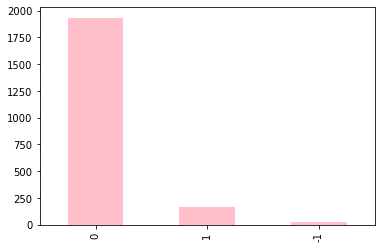

In [25]:
err.value_counts().plot(kind='bar',color='pink')

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.09073812881993418
MSE: 0.09073812881993418
RMSE: 0.301227702610391


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1788  170]
 [  23  146]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1958
           1       0.46      0.86      0.60       169

    accuracy                           0.91      2127
   macro avg       0.72      0.89      0.78      2127
weighted avg       0.95      0.91      0.92      2127



In [28]:
cof = lr_random.best_estimator_.coef_.tolist()

In [29]:
arr=cof[0]
x_ax = [abs(x) for x in arr]

In [32]:
y_ax = ['sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication']

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


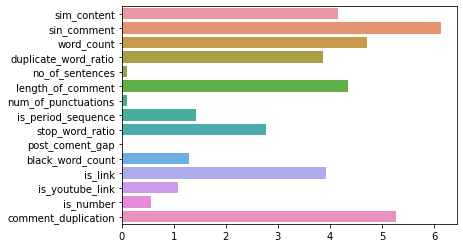

In [33]:
sns.barplot(x_ax,y_ax,orient = 'h')
#plt.xticks(rotation=90)
plt.show()

In [34]:
intercept = lr_random.best_estimator_.intercept_

In [35]:
intercept

array([-15.36134128])

In [ ]:
# best score is  0.8450704225352113

In [36]:
# get the best model in to instance (for save in disk)
best_model = lr_random.best_estimator_ 

In [ ]:
# for save the model if you want
#import pickle
# open a file, where you ant to store the data
#file = open('random_forest_regression_model_v2.pkl', 'wb')
# dump information to that file
#pickle.dump(rf_random, file)

### ROC 

In [37]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [38]:
baseline_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

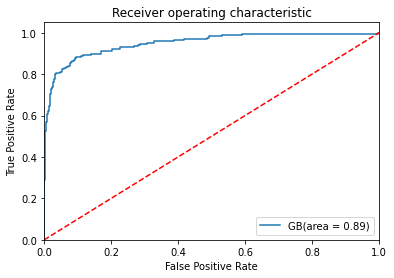

In [39]:
plt.figure()
plt.plot(fprB, tprB, label='GB(area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()